### Importing Libraries


In [70]:
import numpy as np
import pandas as pd
import tensorflow as tf

# PART 1 Preprocessing

### Importing Dataset


In [71]:
dataset = pd.read_csv('diabetes_prediction_dataset.csv')

In [72]:
dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [73]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

In [74]:
pd.DataFrame(X, columns = ["Gender","Age","Hypertension","Heart_Disease","Smoking_History","BMI","HbA1c_Level","Blood_Glucose_Level"])

,Gender,Age,Hypertension,Heart_Disease,Smoking_History,BMI,HbA1c_Level,Blood_Glucose_Level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90
99996,Female,2.0,0,0,No Info,17.37,6.5,100
99997,Male,66.0,0,0,former,27.83,5.7,155
99998,Female,24.0,0,0,never,35.42,4.0,100


In [75]:
pd.DataFrame(y, columns = ["Diabetes"])

,Diabetes
0,0
1,0
2,0
3,0
4,0
...,...
99995,0
99996,0
99997,0
99998,0


### Encoding Categorical Data

Label Encoding the "Gender" column

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

In [77]:
print(X)

[[0 80.0 0 ... 25.19 6.6 140]
 [0 54.0 0 ... 27.32 6.6 80]
 [1 28.0 0 ... 27.32 5.7 158]
 ...
 [1 66.0 0 ... 27.83 5.7 155]
 [0 24.0 0 ... 35.42 4.0 100]
 [0 57.0 0 ... 22.43 6.6 90]]


One Hot Encoding "Smoking History" Column 

In [78]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

### Splitting the dataset into the Training set and Test set

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling


In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [85]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer


In [86]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer


In [87]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [88]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [89]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set


In [90]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
2500/2500 [==============================] - 4s 1ms/step - loss: 0.2169 - accuracy: 0.9187
Epoch 2/100
2500/2500 [==============================] - 3s 1ms/step - loss: 0.1171 - accuracy: 0.9597
Epoch 3/100
2500/2500 [==============================] - 3s 1ms/step - loss: 0.1152 - accuracy: 0.9598
Epoch 4/100
2500/2500 [==============================] - 3s 1ms/step - loss: 0.1140 - accuracy: 0.9599
Epoch 5/100
2500/2500 [==============================] - 3s 1ms/step - loss: 0.1132 - accuracy: 0.9603
Epoch 6/100
2500/2500 [==============================] - 3s 1ms/step - loss: 0.1127 - accuracy: 0.9604
Epoch 7/100
2500/2500 [==============================] - 3s 1ms/step - loss: 0.1120 - accuracy: 0.9605
Epoch 8/100
2500/2500 [==============================] - 3s 1ms/step - loss: 0.1108 - accuracy: 0.9606
Epoch 9/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.1090 - accuracy: 0.9604
Epoch 10/100
2500/2500 [==============================] - 3s 1ms/step - l

## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [91]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

625/625 [==============================] - 1s 957us/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [102]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

# accuracy of model
accuracy = accuracy_score(y_test, y_pred)

# specificity (True Negative Rate) of model
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Sensitivity (Recall) of model
sensitivity = tp / (tp + fn)

# Print the metrics
print("\nAccuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity (Recall):", sensitivity)




Confusion Matrix:
[[18288     9]
 [  543  1160]]

Accuracy: 0.9724
Specificity: 0.999508116084604
Sensitivity (Recall): 0.6811509101585438


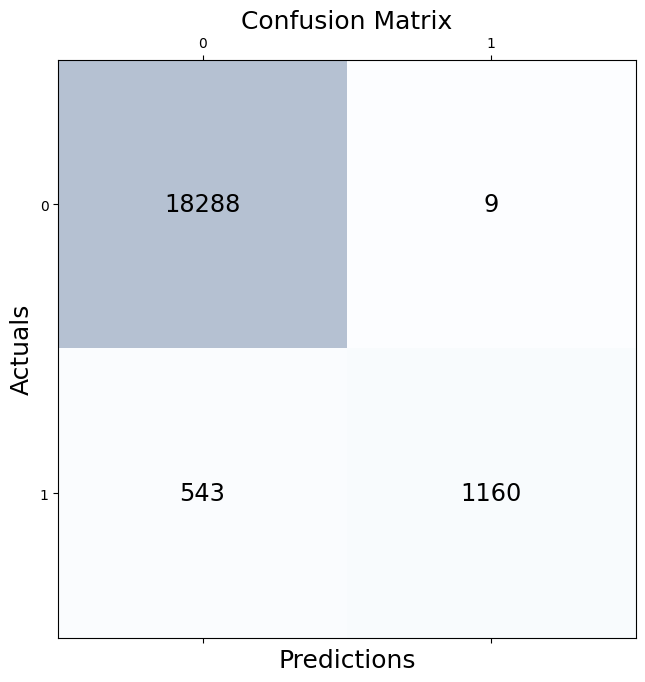

In [93]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()